In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
HouseData = pd.read_csv('train.csv')
HouseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Objective
Final target is to predict "SalePrice" of a house based on the other variables given in the Housing Data 

In [4]:
HouseData.info(max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data and Information

The above info function extracts all the different variables we have the in the dataset
Before we move one we need to understand the different kinds of variables there are in the dataset:

**MSSubClass:** Identifies the type of dwelling involved in the sale.

**MSZoning:** Identifies the general zoning classification of the sale.

**LotFrontage:** Linear feet of street connected to property

**LotArea:** Lot size in square feet

**Street:** Type of road access to property

**Alley:** Type of alley access to property

**LotShape:** General shape of property

**LandContour:** Flatness of the property

**Utilities:** Type of utilities available

**LotConfig:** Lot configuration

**LandSlope:** Slope of property

**Neighborhood:** Physical locations within Ames city limits

**Condition1:** Proximity to various conditions

**Condition2:** Proximity to various conditions (if more than one is present)

**BldgType:** Type of dwelling

**HouseStyle:** Style of dwelling

**OverallQual:** Rates the overall material and finish of the house

**OverallCond:** Rates the overall condition of the house

**YearBuilt:** Original construction date

**YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)

**RoofStyle:** Type of roof

**RoofMatl:** Roof material

**Exterior1st:** Exterior covering on house

**Exterior2nd:** Exterior covering on house (if more than one material)

**MasVnrType:** Masonry veneer type

**MasVnrArea:** Masonry veneer area in square feet

**ExterQual:** Evaluates the quality of the material on the exterior 

**ExterCond:** Evaluates the present condition of the material on the exterior

**Foundation:** Type of foundation

**BsmtQual:** Evaluates the height of the basement

**BsmtCond:** Evaluates the general condition of the basement

**BsmtExposure:** Refers to walkout or garden level walls

**BsmtFinType1:** Rating of basement finished area

**BsmtFinSF1:** Type 1 finished square feet

**BsmtFinType2:** Rating of basement finished area (if multiple types)

**BsmtFinSF2:** Type 2 finished square feet

**BsmtUnfSF:** Unfinished square feet of basement area

**TotalBsmtSF:** Total square feet of basement area

**Heating:** Type of heating

**HeatingQC:** Heating quality and condition

**CentralAir:** Central air conditioning

**Electrical:** Electrical system

**1stFlrSF:** First Floor square feet

**2ndFlrSF:** Second floor square feet

**LowQualFinSF:** Low quality finished square feet (all floors)

**GrLivArea:** Above grade (ground) living area square feet

**BsmtFullBath:** Basement full bathrooms

**BsmtHalfBath:** Basement half bathrooms

**FullBath:** Full bathrooms above grade

**HalfBath:** Half baths above grade

**Bedroom:** Bedrooms above grade (does NOT include basement bedrooms)

**Kitchen:** Kitchens above grade

**KitchenQual:** Kitchen quality

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

**Functional:** Home functionality (Assume typical unless deductions are warranted)

**Fireplaces:** Number of fireplaces

**FireplaceQu:** Fireplace quality

**GarageType:** Garage location

**GarageYrBlt:** Year garage was built

**GarageFinish:** Interior finish of the garage

**GarageCars:** Size of garage in car capacity

**GarageArea:** Size of garage in square feet

**GarageQual:** Garage quality

**GarageCond:** Garage condition

**PavedDrive:** Paved driveway

**WoodDeckSF:** Wood deck area in square feet

**OpenPorchSF:** Open porch area in square feet

**EnclosedPorch:** Enclosed porch area in square feet

**3SsnPorch:** Three season porch area in square feet

**ScreenPorch:** Screen porch area in square feet

**PoolArea:** Pool area in square feet

**PoolQC:** Pool quality

**Fence:** Fence quality

**MiscFeature:** Miscellaneous feature not covered in other categories

**MiscVal:** $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

SaleCondition: Condition of sale


# Numerical Data

In [5]:
#Extracting Numerical Data that is useful in predicting SalePrice
houseNumData = pd.DataFrame(HouseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

## Description
The Lot Area is very concentrated within the 2nd and 3rd quartile. Although there are houses with significantly higher Lot Area, there are not many of them

Ground living Area has a wider spread almost the 2nd widest spread among these variables. Using the histogram it can be seen that many houses have ground living area between 1000 and 2000 approximately

Garage Area is the most deviated from a normal distribution

Saleprice and lot area resemble the most to a normal distribution

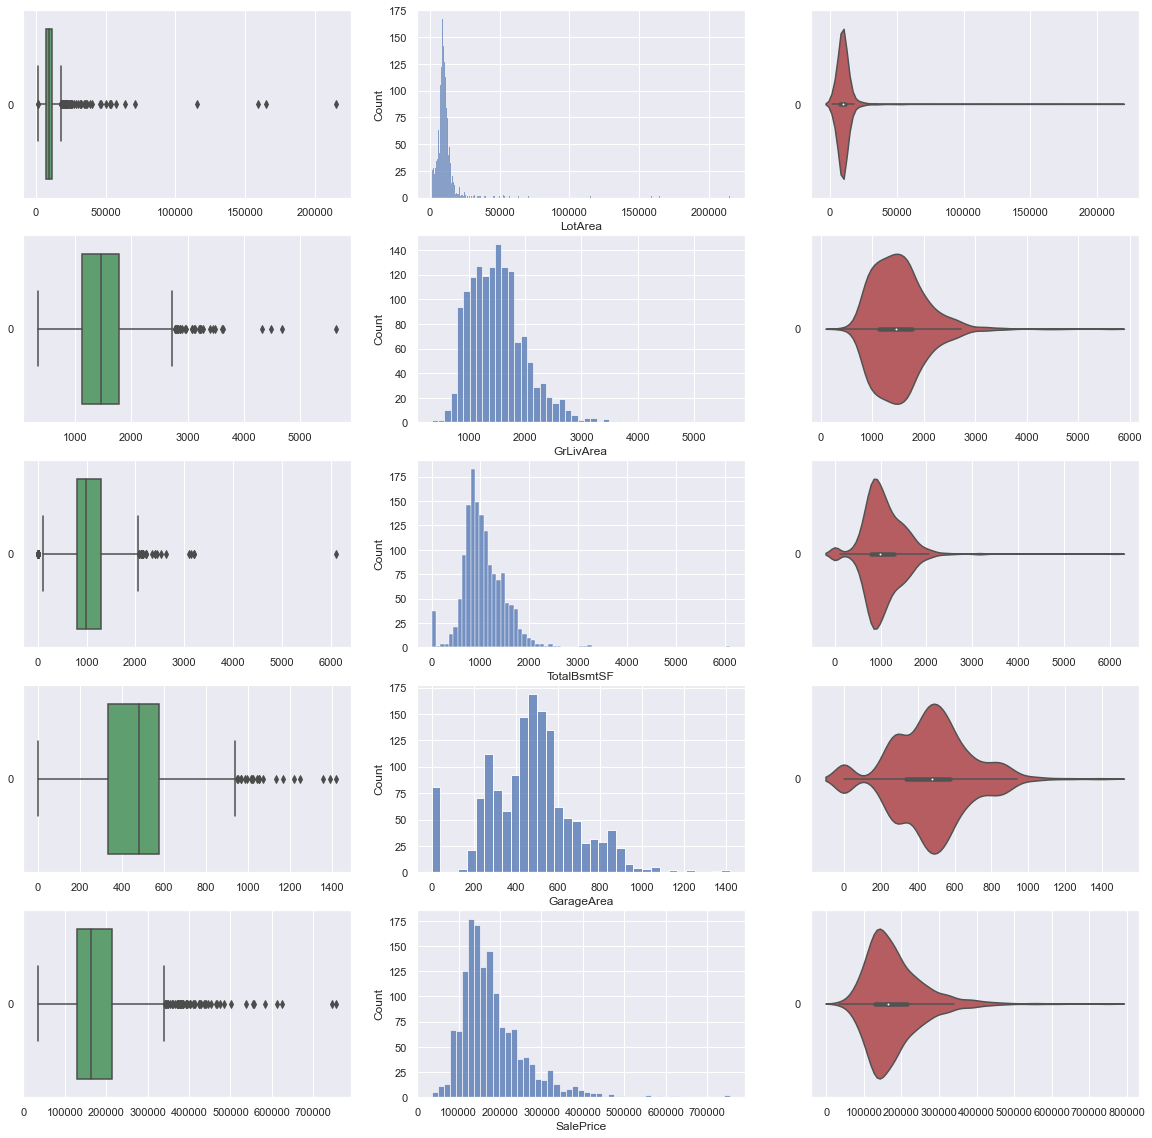

In [6]:
#Get the descriptions and visual representation of the variables 
#Running a for loop 
f, axes = plt.subplots(5, 3, figsize=(20, 20))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0], color='g')
    sb.histplot(data = houseNumData[var], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2], color='r')
    count += 1

## Skewness

The most skewed data is actually the LotArea

In [7]:
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

## Checking the Mutual Relationship
Using the corr() and the heatmap, the relationship between two variables are found
The heat map shows correlation between all the variables. 
We only need to see the correlation between SalePrice and the other variables
The lot area seems to not affect SalePrice at all
TotalBsmtSf and GarageArea moderately affect SalePrice
GrnLivArea affects SalePrice the most

While 0.708624 is a high number, it may not be considered a very high number to the point where we can say with high confidence that SalePrice and GrnLiveArea are related. 
Again that said, we are using the pearson's correlation that assumes there is a linear relationship

In [8]:
houseNumData.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


<AxesSubplot:>

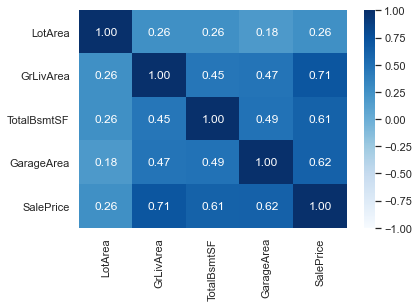

In [9]:
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap ="Blues")

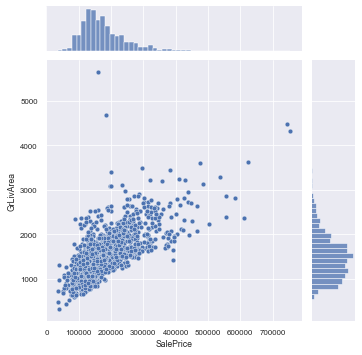

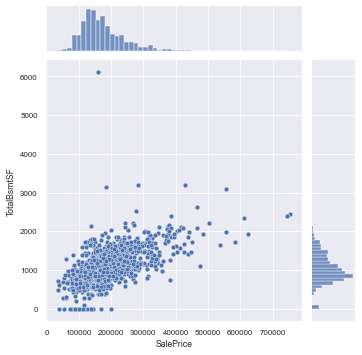

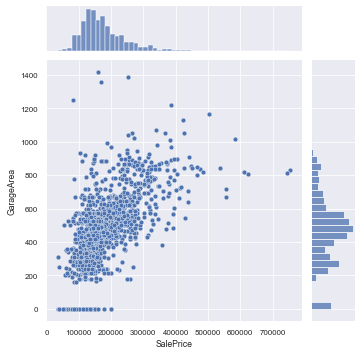

In [112]:
sb.jointplot(data = houseNumData, x = "SalePrice", y = "GrLivArea", height = 5)
sb.jointplot(data = houseNumData, x = "SalePrice", y = "TotalBsmtSF", height = 5)
sb.jointplot(data = houseNumData, x = "SalePrice", y = "GarageArea", height = 5)

From the above graphs, it is more clear that GarageArea does not affect SalePrice significantly
TotalBsmtSF and GrLivArea seems to affect it more

In [11]:
houseNumData.corr("kendall")

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.304676,0.252669,0.247904,0.314174
GrLivArea,0.304676,1.000000,0.295670,0.328578,0.543942
TotalBsmtSF,0.252669,0.295670,1.000000,0.338118,0.435018
GarageArea,0.247904,0.328578,0.338118,1.000000,0.478146
SalePrice,0.314174,0.543942,0.435018,0.478146,1.000000


In [12]:
houseNumData.corr("spearman")

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.449040,0.366197,0.367153,0.456461
GrLivArea,0.449040,1.000000,0.371026,0.468211,0.731310
TotalBsmtSF,0.366197,0.371026,1.000000,0.486685,0.602725
GarageArea,0.367153,0.468211,0.486685,1.000000,0.649379
SalePrice,0.456461,0.731310,0.602725,0.649379,1.000000


#### Conclusion 

The minute it is assumed to be not linear and a Kendall relationship is used, we see that the strength of relationship falls. 
Using Spearman, the relationship is shown to be stronger. 
But regardless GrLivArea affect the most

# Categorical Data

In [19]:
houseCatData = pd.DataFrame(HouseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [20]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [21]:
houseCatData["MSSubClass"] = houseCatData['MSSubClass'].astype('category')
houseCatData["Neighborhood"] = houseCatData['Neighborhood'].astype('category')
houseCatData["BldgType"] = houseCatData['BldgType'].astype('category')
houseCatData["OverallQual"] = houseCatData['OverallQual'].astype('category')

In [16]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 8.0 KB


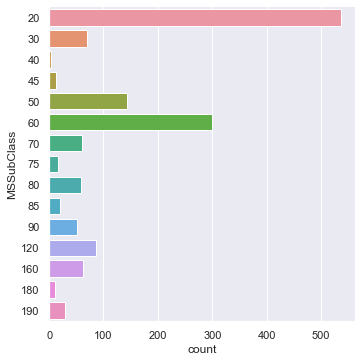

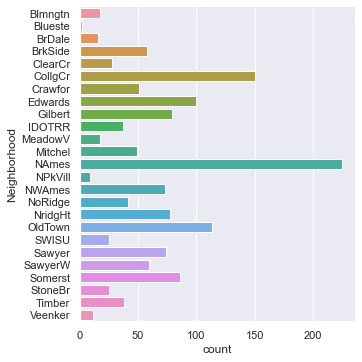

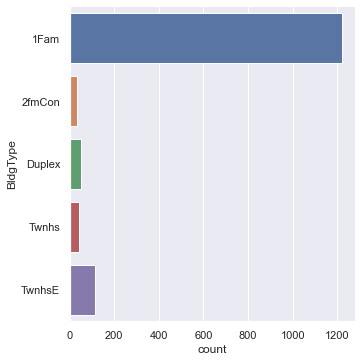

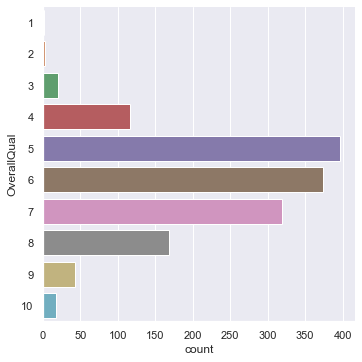

In [22]:
sb.catplot(y = "MSSubClass", data = houseCatData, kind = "count")
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count")
sb.catplot(y = "BldgType", data = houseCatData, kind = "count")
sb.catplot(y = "OverallQual", data = houseCatData, kind = "count")

<AxesSubplot:xlabel='MSSubClass', ylabel='OverallQual'>

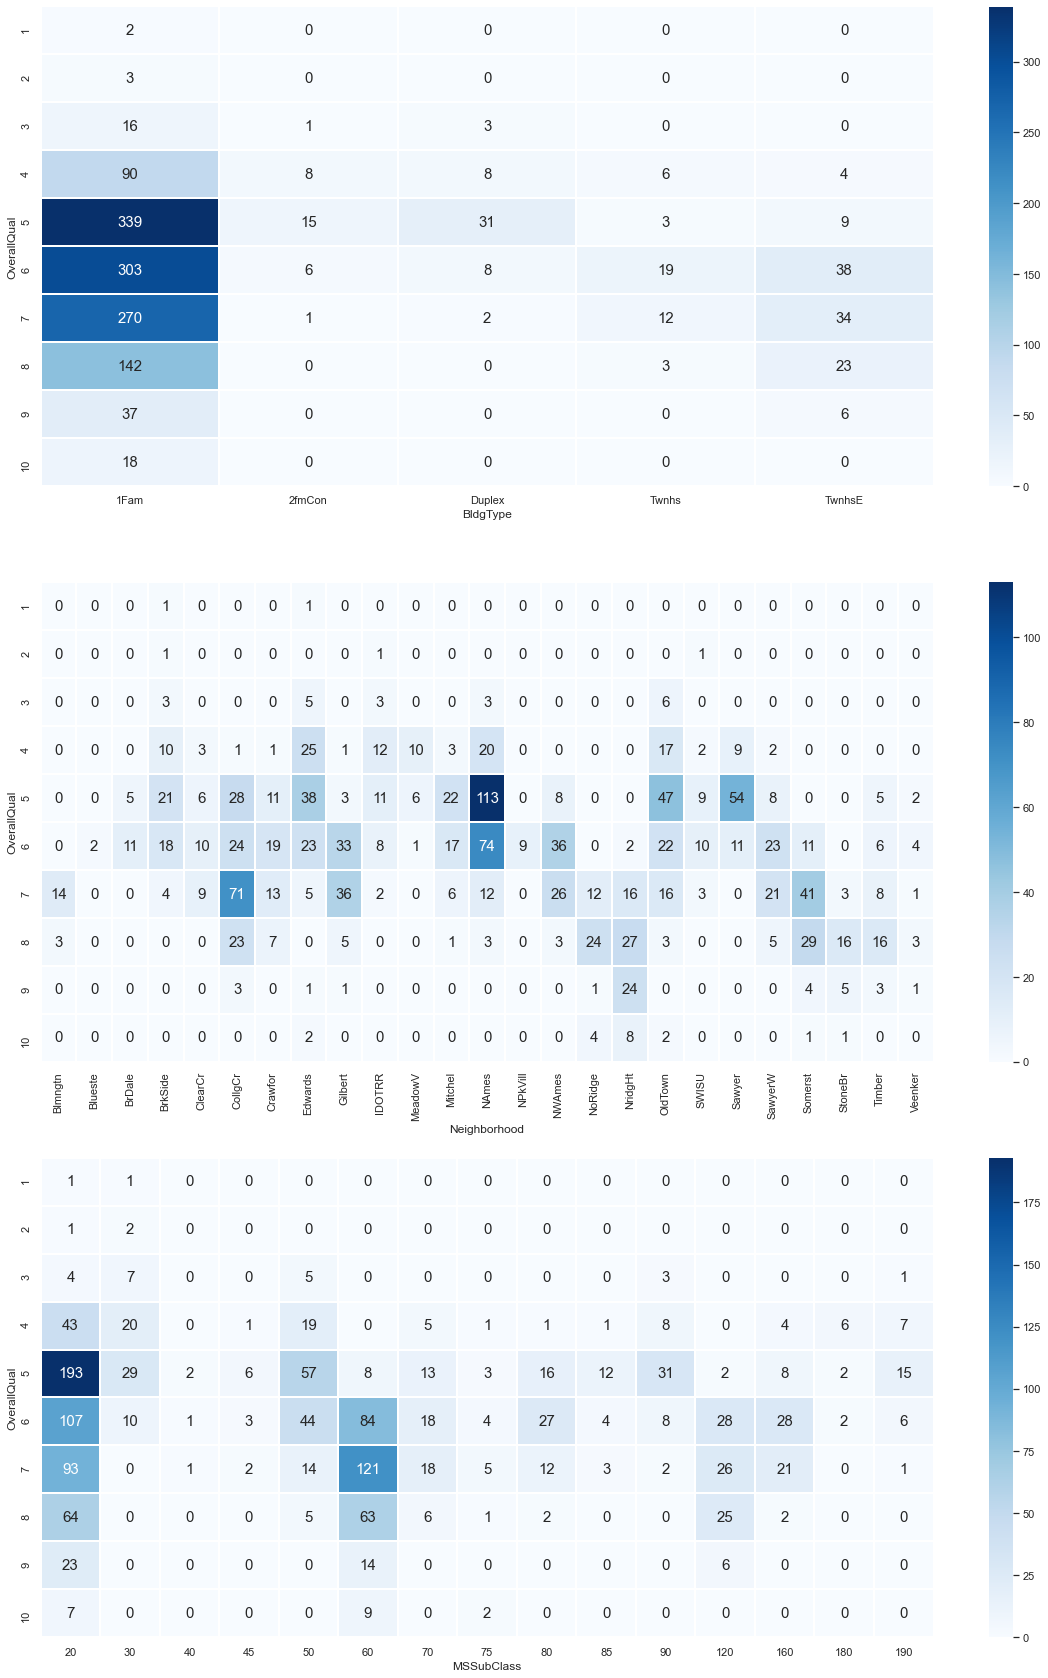

In [35]:
f, axes = plt.subplots(3,1, figsize=(20, 30))

sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 15}, fmt=".0f",cmap = "Blues", ax = axes[0])

sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 15}, fmt=".0f",cmap = "Blues", ax = axes[1])

sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 15},fmt=".0f", cmap = "Blues", ax = axes[2])

In [87]:
houseNewData = pd.DataFrame(HouseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual', 'SalePrice']])
houseNewData["YearBuilt"] = houseNewData['YearBuilt'].astype('category')
houseNewData["MSSubClass"] = houseNewData['MSSubClass'].astype('category')
houseNewData["Neighborhood"] = houseNewData['Neighborhood'].astype('category')
houseNewData["BldgType"] = houseNewData['BldgType'].astype('category')
houseNewData["OverallQual"] = houseNewData['OverallQual'].astype('category')

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

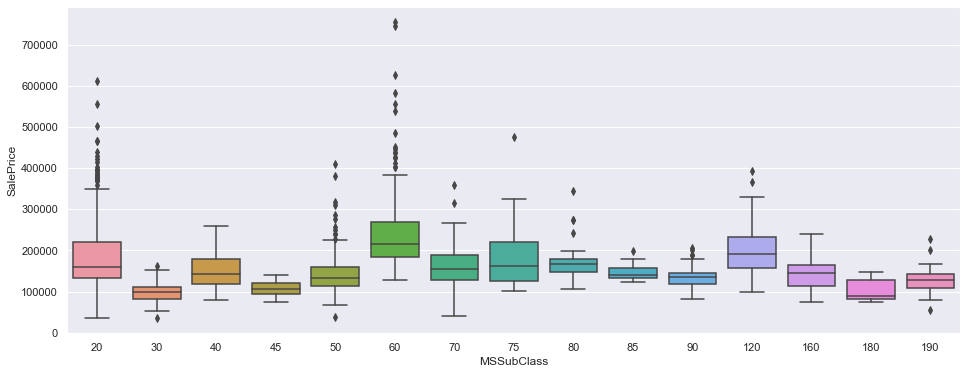

In [77]:
plt.figure(figsize=(16, 6))
sb.boxplot(x='MSSubClass', y="SalePrice", data=houseNewData)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

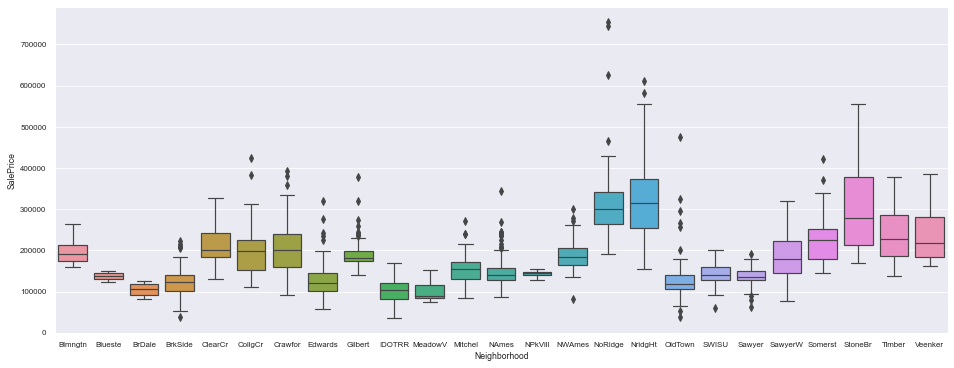

In [83]:
plt.figure(figsize=(16, 6))
sb.set_context("paper", font_scale=0.9)  
sb.boxplot(x='Neighborhood', y="SalePrice", data=houseNewData)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

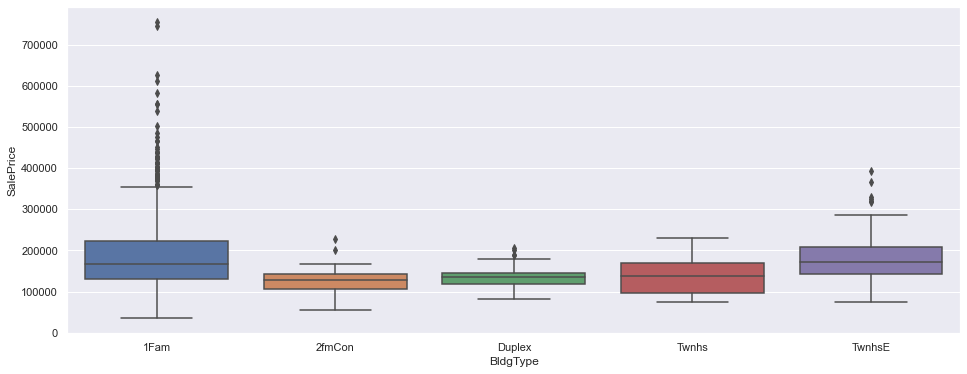

In [80]:
plt.figure(figsize=(16, 6))
sb.boxplot(x='BldgType', y="SalePrice", data=houseNewData)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

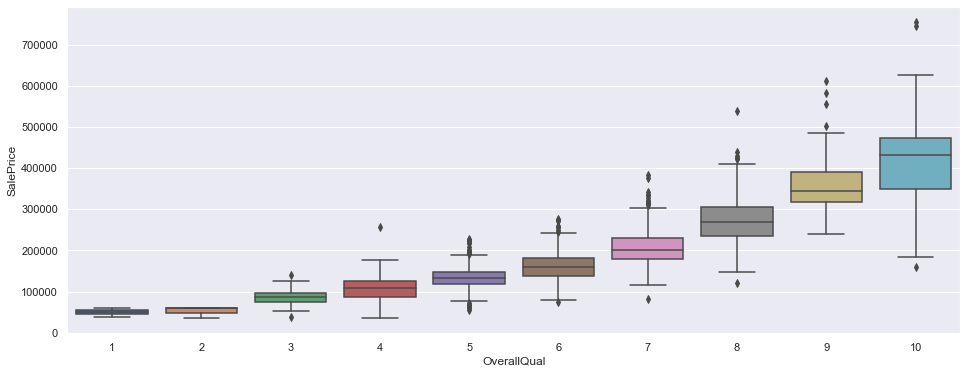

In [81]:
plt.figure(figsize=(16, 6))
sb.boxplot(x='OverallQual', y="SalePrice", data=houseNewData)

### Conclusion 
The OveralQual affects the SalePrice the most.
The Neighborhood also affects the SalePrice. E.g. BrDale, NridgHt

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

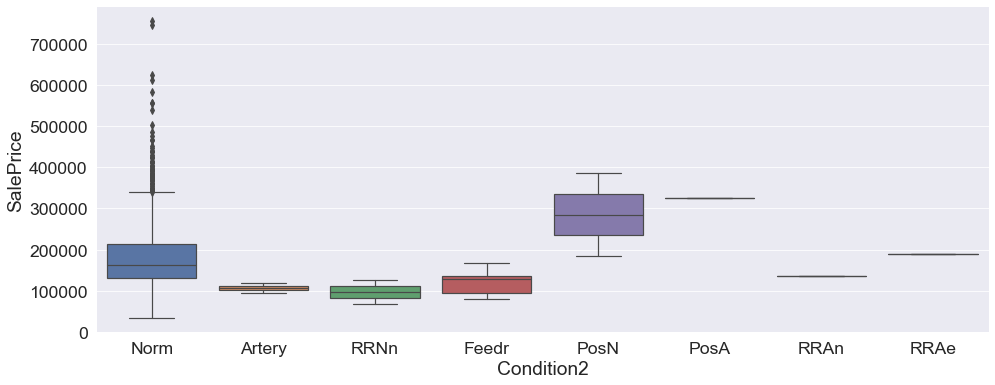

In [95]:
plt.figure(figsize=(16, 6))
sb.set_context("paper", font_scale=2)  
sb.boxplot(x='Condition2', y="SalePrice", data=HouseData)

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

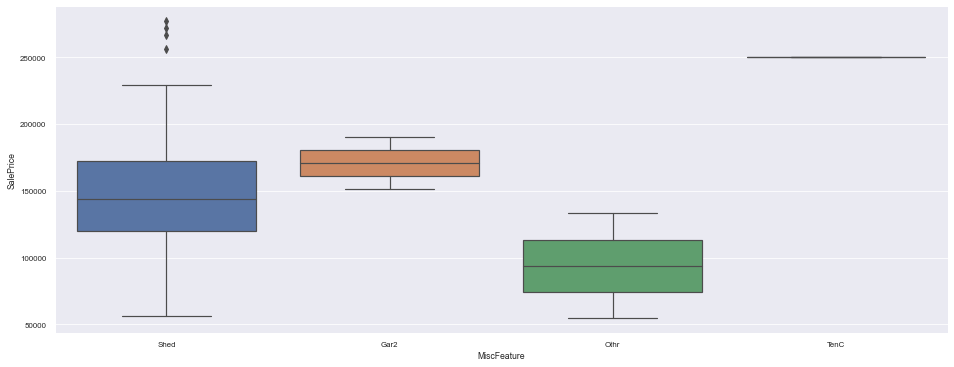

In [105]:
plt.figure(figsize=(16, 6))
sb.set_context("paper", font_scale=0.9)  
sb.boxplot(x='MiscFeature', y="SalePrice", data=HouseData)
#Tennis Court makes it very expensive

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

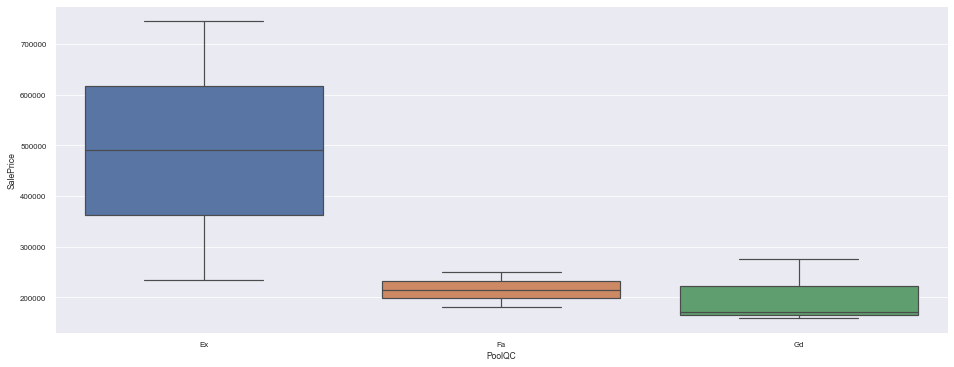

In [111]:
plt.figure(figsize=(16, 6))
sb.set_context("paper", font_scale=0.9)  
sb.boxplot(x='PoolQC', y="SalePrice", data=HouseData)